In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('scope_11.csv', delimiter=',', skiprows=1)

In [7]:
df

,second,Volt,Volt.1
0,-0.000369,NaN,NaN
1,-0.000369,NaN,NaN
2,-0.000369,NaN,NaN
3,-0.000369,NaN,NaN
4,-0.000369,NaN,NaN
...,...,...,...
62495,0.000631,-0.036200,-0.001471
62496,0.000631,-0.036200,-0.001974
62497,0.000631,-0.037707,-0.001974
62498,0.000631,-0.040220,-0.001672


In [17]:
df = df.dropna()


In [5]:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# 


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


In [18]:
df
t = df.iloc[:,0] * 1e6 #us!
trans = df.iloc[:,1]
errsig = df.iloc[:,2]

Text(0.5, 0, 'Time ($\\mu$s)')

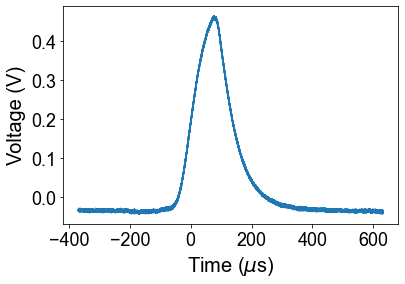

In [19]:
plt.plot(t,trans, label='Transmission')
plt.ylabel('Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
# plt.plot(t,errsig, label='Error signal')
# plt.fill_between

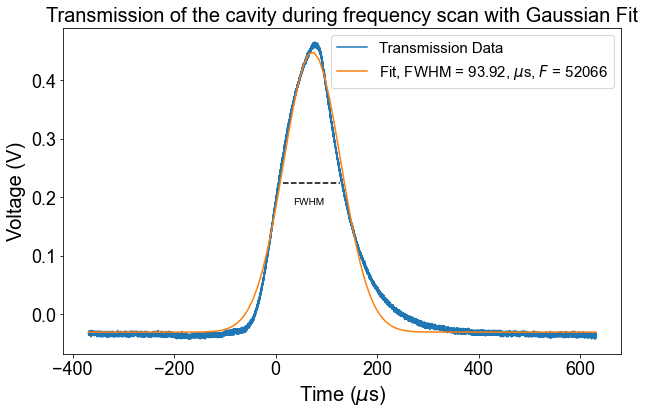

FWHM: -93.91968457888503


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, offset):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2) + offset

# Prepare the data
x = t.values
y = trans.values

# Perform the curve fitting
p0 = [1, np.mean(x), np.std(x), 20]  # Initial guess for the parameters
params, _ = curve_fit(gaussian, x, y, p0=p0)

# Extract the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]

# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *params)

plt.figure(figsize=(10,6))

# Plot the full width half maxima as a horizontal line
y_max = max(y_fit)
half_max = y_max / 2
mask = y_fit > half_max
x_fwhm = x_fit[mask]
plt.hlines(half_max, x_fwhm[0], x_fwhm[-1], linestyles='dashed', color='black')
plt.text(x_fwhm[0]+ 20, half_max-0.04, 'FWHM', verticalalignment='bottom', color='black')

conversion_factor = 306.75 # 1 us = 306.75Hz
FWHM_Hz = fwhm * conversion_factor
finesse = 1.5e9/FWHM_Hz

plt.plot(x, y,label='Transmission Data')
plt.plot(x_fit, y_fit, label=r'Fit, FWHM = %.2f, $\mu$s, $F$ = %.0f'%(-fwhm,-finesse))
plt.ylabel('Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
plt.title('Transmission of the cavity during frequency scan with Gaussian Fit')
plt.legend()
plt.show()

print('FWHM:', fwhm)
